# <font style = "color:rgb(50,120,229)">Spam Detection using SVM Classifier</font>

## <font style = "color:rgb(50,120,229)">Topic</font>

To build a spam detection model using Classification method.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

**Note**: UTF-8 encoding doesn't work on the dataset provided.

In [3]:
spam = pd.read_csv("spam.csv",encoding="latin-1")

In [4]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spam["Unnamed: 2"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Unnamed: 2, Length: 5572, dtype: object

In [6]:
spam["Unnamed: 2"].isnull().sum(axis=0)

5522

In [7]:
spam[spam["Unnamed: 2"].isnull() == False]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [8]:
spam[spam["Unnamed: 3"].isnull() == False]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...,JUST REALLYNEED 2DOCD.PLEASE DONTPLEASE DONTIG...,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",NaN
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3145,ham,\SHIT BABE.. THASA BIT MESSED UP.YEH,SHE SHUDVETOLD U. DID URGRAN KNOW?NEWAY,"ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""""",NaN
3506,ham,Two fundamentals of cool life: \Walk,"like you are the KING\""...! OR \""Walk like yo...","whoever is the KING\""!... Gud nyt""",NaN
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


In [9]:
spam[spam["Unnamed: 4"].isnull() == False]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


As we can see there are several non-null values in columns: "`Unnamed: 2`" to "`Unnamed: 4`"

Let's create a new column which has the complete information.

First, replace all NANs with `" "`

In [10]:
spam.fillna(" ",inplace=True)

In [11]:
spam["v2"] = spam["v2"] + "," + spam["Unnamed: 2"] + "," + spam["Unnamed: 3"] + "," + spam["Unnamed: 4"]

In [12]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,"Ok lar... Joking wif u oni..., , ,",,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [13]:
# Remove columns
spam.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

Next, let's plot the distribution of `spam` versus `ham` messages.

In [14]:
counts = pd.value_counts(spam["v1"],sort=True)

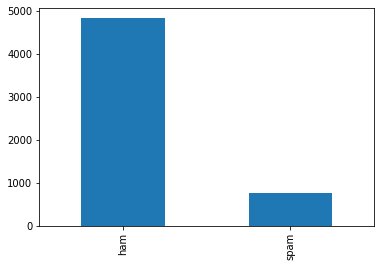

In [15]:
counts.plot(kind="bar")
plt.show()

In [16]:
print("Percent of SPAM messages: {:.2f}%".format(counts["spam"]/len(spam) * 100))

Percent of SPAM messages: 13.41%


In [17]:
print("Percent of HAM messages: {:.2f}%".format(counts["ham"]/len(spam) * 100))

Percent of HAM messages: 86.59%


Next, let's find the frequencies of words in the dataset and what are the 20 most common words.

In [18]:
count_20_most_common_ham = Counter(" ".join(spam[spam['v1']=='ham']["v2"]).split()).most_common(20)

In [19]:
print(count_20_most_common_ham)

[(',', 9774), ('to', 1535), ('you', 1439), ('I', 1438), ('the', 1029), ('a', 976), ('i', 741), ('and', 739), ('in', 731), ('u', 644), ('is', 639), ('my', 621), ('me', 522), ('of', 498), ('for', 480), ('that', 387), ('your', 373), ('it', 368), ('have', 349), ('on', 349)]


In [20]:
df1 = pd.DataFrame.from_dict(count_20_most_common_ham)

In [21]:
df1.head()

,0,1
0,",",9774
1,to,1535
2,you,1439
3,I,1438
4,the,1029


In [22]:
df1 = df1.rename(columns={0: "ham words", 1 : "count"})

In [23]:
df1.head()

,ham words,count
0,",",9774
1,to,1535
2,you,1439
3,I,1438
4,the,1029


In [24]:
count_20_most_common_spam = Counter(" ".join(spam[spam['v1']=='spam']["v2"]).split()).most_common(20)

In [25]:
df2 = pd.DataFrame.from_dict(count_20_most_common_spam)

In [26]:
df2 = df2.rename(columns={0: "spam words", 1 : "count"})

In [27]:
df2.head()

,spam words,count
0,",",1519
1,to,607
2,a,360
3,your,186
4,or,185


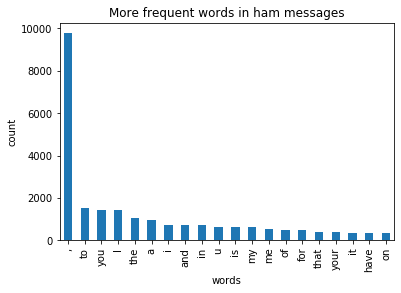

In [28]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["ham words"]))
plt.xticks(y_pos, df1["ham words"])
plt.title('More frequent words in ham messages')
plt.xlabel('words')
plt.ylabel('count')
plt.show()

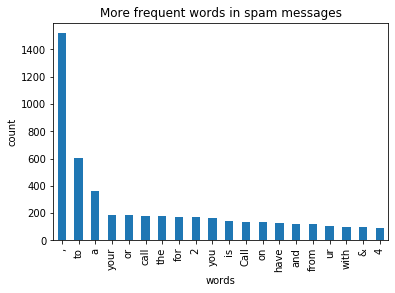

In [29]:
df2.plot.bar(legend = False)
y_pos = np.arange(len(df2["spam words"]))
plt.xticks(y_pos, df2["spam words"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('count')
plt.show()

Clearly the most frequent words are stop words and should be removed.

In [30]:
transform = CountVectorizer(stop_words="english")

In [31]:
X = transform.fit_transform(spam["v2"])

In [32]:
np.shape(X)

(5572, 8491)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
spam["v1"]=spam["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = train_test_split(X, spam['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8491), (1839, 8491)]


Now, we will train the Support Vector Machine Classifier. The parameter to focus on is `C`. We will use `sklearn.model_selection.GridSearchCV` to find the best `C` parameter.

In [35]:
# Define list of parameters C
C = [10**i for i in range(-3,5)]

In [36]:
C

[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [37]:
param_grid = {"C":C}

In [38]:
# Create the classifier
svc = svm.SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
grid_search.best_params_

{'C': 10000}

In [40]:
svc = svm.SVC(C=10000)
svc.fit(X_train,y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
grid_predictions = svc.predict(X_test)

In [42]:
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.87      0.93       252

    accuracy                           0.98      1839
   macro avg       0.99      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [43]:
confusion_matrix(y_test,svc.predict(X_test))

array([[1587,    0],
       [  32,  220]])

We misclassified only 32 spam messages as non-spam whereas we didn't misclassify any non-spam message. This way a user won't miss any important message.

We also managed to attain 98.26% accuracy on test-set.